In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

Step 1: load the dataset

In [2]:
# load the file
url = "https://www.dropbox.com/scl/fi/ezo4vc5jfgwsd4o5ytrzz/LCA_Disclosure_Data_FY2025_Q3.csv?rlkey=kn6ewdyacyoh4nlz1r4jegxm0&dl=1"
h1b = pd.read_csv(url, low_memory=False)
print(h1b.head())

          CASE_NUMBER CASE_STATUS RECEIVED_DATE DECISION_DATE  \
0  I-200-25181-143446   Withdrawn       6/30/25       6/30/25   
1  I-200-25181-141251   Withdrawn       6/30/25       6/30/25   
2  I-200-25181-142198   Withdrawn       6/30/25       6/30/25   
3  I-200-25181-138847   Withdrawn       6/30/25       6/30/25   
4  I-200-25181-140402   Withdrawn       6/30/25       6/30/25   

  ORIGINAL_CERT_DATE VISA_CLASS                              JOB_TITLE  \
0                NaN       H-1B                        Data Scientists   
1                NaN       H-1B  IT Technical Associate - Developer II   
2                NaN       H-1B                     Research Associate   
3                NaN       H-1B          Business Architecture Manager   
4                NaN       H-1B                         Senior Manager   

  SOC_CODE                                  SOC_TITLE FULL_TIME_POSITION  ...  \
0  15-2051                            Data Scientists                  Y  ...   
1 

In [4]:
h1b.info()
h1b.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036449 entries, 0 to 1036448
Data columns (total 97 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   CASE_NUMBER                     479005 non-null  object 
 1   CASE_STATUS                     479005 non-null  object 
 2   RECEIVED_DATE                   479005 non-null  object 
 3   DECISION_DATE                   479005 non-null  object 
 4   ORIGINAL_CERT_DATE              22002 non-null   object 
 5   VISA_CLASS                      479005 non-null  object 
 6   JOB_TITLE                       479005 non-null  object 
 7   SOC_CODE                        479005 non-null  object 
 8   SOC_TITLE                       479005 non-null  object 
 9   FULL_TIME_POSITION              479005 non-null  object 
 10  BEGIN_DATE                      479005 non-null  object 
 11  END_DATE                        479005 non-null  object 
 12  TOTAL_WORKER_P

,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_PHONE,EMPLOYER_POC_PHONE_EXT,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,WORKSITE_WORKERS,PW_OTHER_YEAR,TOTAL_WORKSITE_LOCATIONS
count,479005.000000,479005.000000,479005.000000,479005.000000,479005.000000,479005.000000,479005.000000,4.790050e+05,25785.000000,479005.000000,4.790050e+05,24276.000000,3.623840e+05,18359.000000,479005.000000,34450.000000,479005.000000
mean,1.635645,0.614313,0.392998,0.144063,0.019971,0.215908,0.266924,1.639156e+10,556.639946,430122.284523,1.696708e+10,894.283325,1.533858e+10,1214.222125,1.632486,2024.139158,1.482141
std,6.246523,4.866239,1.357995,1.078636,4.105841,0.968687,1.146348,1.108429e+11,1498.848596,204580.923319,2.036126e+11,1790.143618,2.720278e+10,2597.953038,6.224068,0.899890,0.776005
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.497194e+08,0.000000,-131199.000000,4.497194e+08,0.000000,1.053717e+09,0.000000,1.000000,1990.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.312764e+10,0.000000,334413.000000,1.312732e+10,0.000000,1.312465e+10,100.000000,1.000000,2024.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.512761e+10,0.000000,541213.000000,1.518938e+10,1.000000,1.469503e+10,201.000000,1.000000,2024.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.732662e+10,165.000000,541512.000000,1.720709e+10,1031.000000,1.703678e+10,237.000000,1.000000,2025.000000,2.000000
max,1325.000000,1325.000000,60.000000,100.000000,1325.000000,35.000000,60.000000,6.106145e+13,9639.000000,928120.000000,9.721848e+13,9908.000000,8.618617e+12,9487.000000,1325.000000,2025.000000,10.000000


In [ ]:
# Explore some of the columns
h1b[["JOB_TITLE", "SOC_TITLE", "PREVAILING_WAGE", "EMPLOYER_NAME",
     "EMPLOYER_POC_CITY", "EMPLOYER_POSTAL_CODE",
      "LAWFIRM_NAME_BUSINESS_NAME"]].head(5)


,JOB_TITLE,SOC_TITLE,PREVAILING_WAGE,EMPLOYER_NAME,WORKSITE_WORKERS,EMPLOYER_POC_CITY,EMPLOYER_POSTAL_CODE,LAWFIRM_NAME_BUSINESS_NAME
0,Data Scientists,Data Scientists,"$136,011.00","Urban Outfitters, Inc.",1.0,Philadelphia,19112,"Corporate Immigration Partners, P.C."
1,IT Technical Associate - Developer II,Database Administrators,"$50,877.00",Illinois Wesleyan University,1.0,Charleston,61702,"Dunn Law Firm, LLP"
2,Research Associate,Biochemists and Biophysicists,"$69,618.00",TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,1.0,Philadelphia,19104,NaN
3,Business Architecture Manager,Computer Systems Analysts,"$140,421.00",Accenture LLP,1.0,CHICAGO,60661,NaN
4,Senior Manager,Computer and Information Systems Managers,"$194,626.00",Wayfair LLC,1.0,Boston,02116,Erickson Immigration Group


In [18]:
# Select columns as the features
col = ["CASE_STATUS", "VISA_CLASS", "SOC_TITLE", "FULL_TIME_POSITION",
                   "EMPLOYER_CITY", "PREVAILING_WAGE", "EMPLOYER_NAME"]

h1b[col].head(10)

,CASE_STATUS,VISA_CLASS,SOC_TITLE,FULL_TIME_POSITION,EMPLOYER_CITY,PREVAILING_WAGE,EMPLOYER_NAME
0,Withdrawn,H-1B,Data Scientists,Y,Philadelphia,"$136,011.00","Urban Outfitters, Inc."
1,Withdrawn,H-1B,Database Administrators,Y,Bloomington,"$50,877.00",Illinois Wesleyan University
2,Withdrawn,H-1B,Biochemists and Biophysicists,Y,PHILADELPHIA,"$69,618.00",TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA
3,Withdrawn,H-1B,Computer Systems Analysts,Y,Chicago,"$140,421.00",Accenture LLP
4,Withdrawn,H-1B,Computer and Information Systems Managers,Y,Boston,"$194,626.00",Wayfair LLC
5,Withdrawn,H-1B,Database Administrators,Y,Secaucus,"$85,114.00",Ernst & Young U.S. LLP
6,Withdrawn,H-1B,"Engineering Teachers, Postsecondary",Y,Louisville,"$57,000.00",University of Louisville
7,Withdrawn,H-1B,Database Administrators,Y,Secaucus,"$80,163.00",Ernst & Young U.S. LLP
8,Withdrawn,H-1B,Software Quality Assurance Analysts and Testers,Y,ROCKVILLE,"$106,517.00",TATA CONSULTANCY SERVICES LIMITED
9,Withdrawn,H-1B,Software Developers,Y,Alpharetta,"$105,227.00",INFOTECH PRISM LLC


Note: I removed the missing values before spliting the data. (Pandas doesn't let me split the data if there are mising values.)

In [19]:
print(h1b[col].isna().sum())
print(h1b[col].shape)
h1b_no_missing = h1b[col].dropna()
print(h1b_no_missing.isnull().values.any())
print(h1b_no_missing.shape)

CASE_STATUS           557444
VISA_CLASS            557444
SOC_TITLE             557444
FULL_TIME_POSITION    557444
EMPLOYER_CITY         557444
PREVAILING_WAGE       557444
EMPLOYER_NAME         557444
dtype: int64
(1036449, 7)
False
(479005, 7)


Step 2: Split the dataset into training and testing sets.

In [20]:
# Split the data
X = h1b_no_missing[col].drop("CASE_STATUS", axis=1)
y = h1b_no_missing["CASE_STATUS"]
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape

CASE_STATUS
Certified                446456
Certified - Withdrawn     22002
Withdrawn                  7667
Denied                     2880
Name: count, dtype: int64


((383204, 6), (95801, 6))

Step 3: Explore training set.

In [21]:
X_train.info()
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 383204 entries, 121861 to 371399
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   VISA_CLASS          383204 non-null  object
 1   SOC_TITLE           383204 non-null  object
 2   FULL_TIME_POSITION  383204 non-null  object
 3   EMPLOYER_CITY       383204 non-null  object
 4   PREVAILING_WAGE     383204 non-null  object
 5   EMPLOYER_NAME       383204 non-null  object
dtypes: object(6)
memory usage: 20.5+ MB


,VISA_CLASS,SOC_TITLE,FULL_TIME_POSITION,EMPLOYER_CITY,PREVAILING_WAGE,EMPLOYER_NAME
count,383204,383204,383204,383204,383204,383204
unique,4,837,2,6863,25377,58372
top,H-1B,Software Developers,Y,New York,"$105,997.00",Amazon.com Services LLC
freq,374791,116514,375936,16873,6721,8670


Step 4: Data cleaning. I created a data pipeline for numerical data: remove "$", convert it to float, and scale it using MaxAbsScaler().

In [22]:
# pipeline for numerical data
def extra_numbers(X):
    X = X.copy()
    X = X.replace('[$,]', '', regex=True)
    return pd.to_numeric(X.squeeze(), errors='coerce').to_frame()

num_pipeline = Pipeline([
    ("clean", FunctionTransformer(extra_numbers, validate=False)),
    ("scale", MaxAbsScaler())
])

In [23]:
# Identify categorical and numerical variables (columns)
cat_cols = ["VISA_CLASS", "SOC_TITLE", "FULL_TIME_POSITION",
                   "EMPLOYER_CITY", "EMPLOYER_NAME"]
num_cols = ["PREVAILING_WAGE"]

Step 5: Visualize the data in the training set. (Note: I waasn't able to to do plotting.scatter_matrix() because most of my features are categorical.)

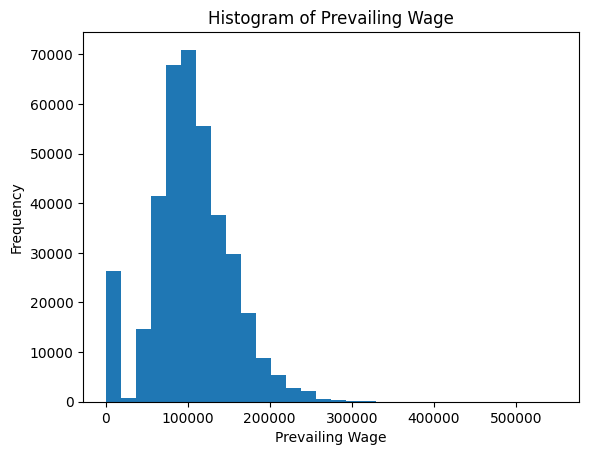

In [24]:
# Plot histogram for the numerical data
extracted_num = extra_numbers(X_train[num_cols])
plt.hist(extracted_num, bins=30)
plt.xlabel('Prevailing Wage')
plt.ylabel('Frequency')
plt.title('Histogram of Prevailing Wage')
plt.show()

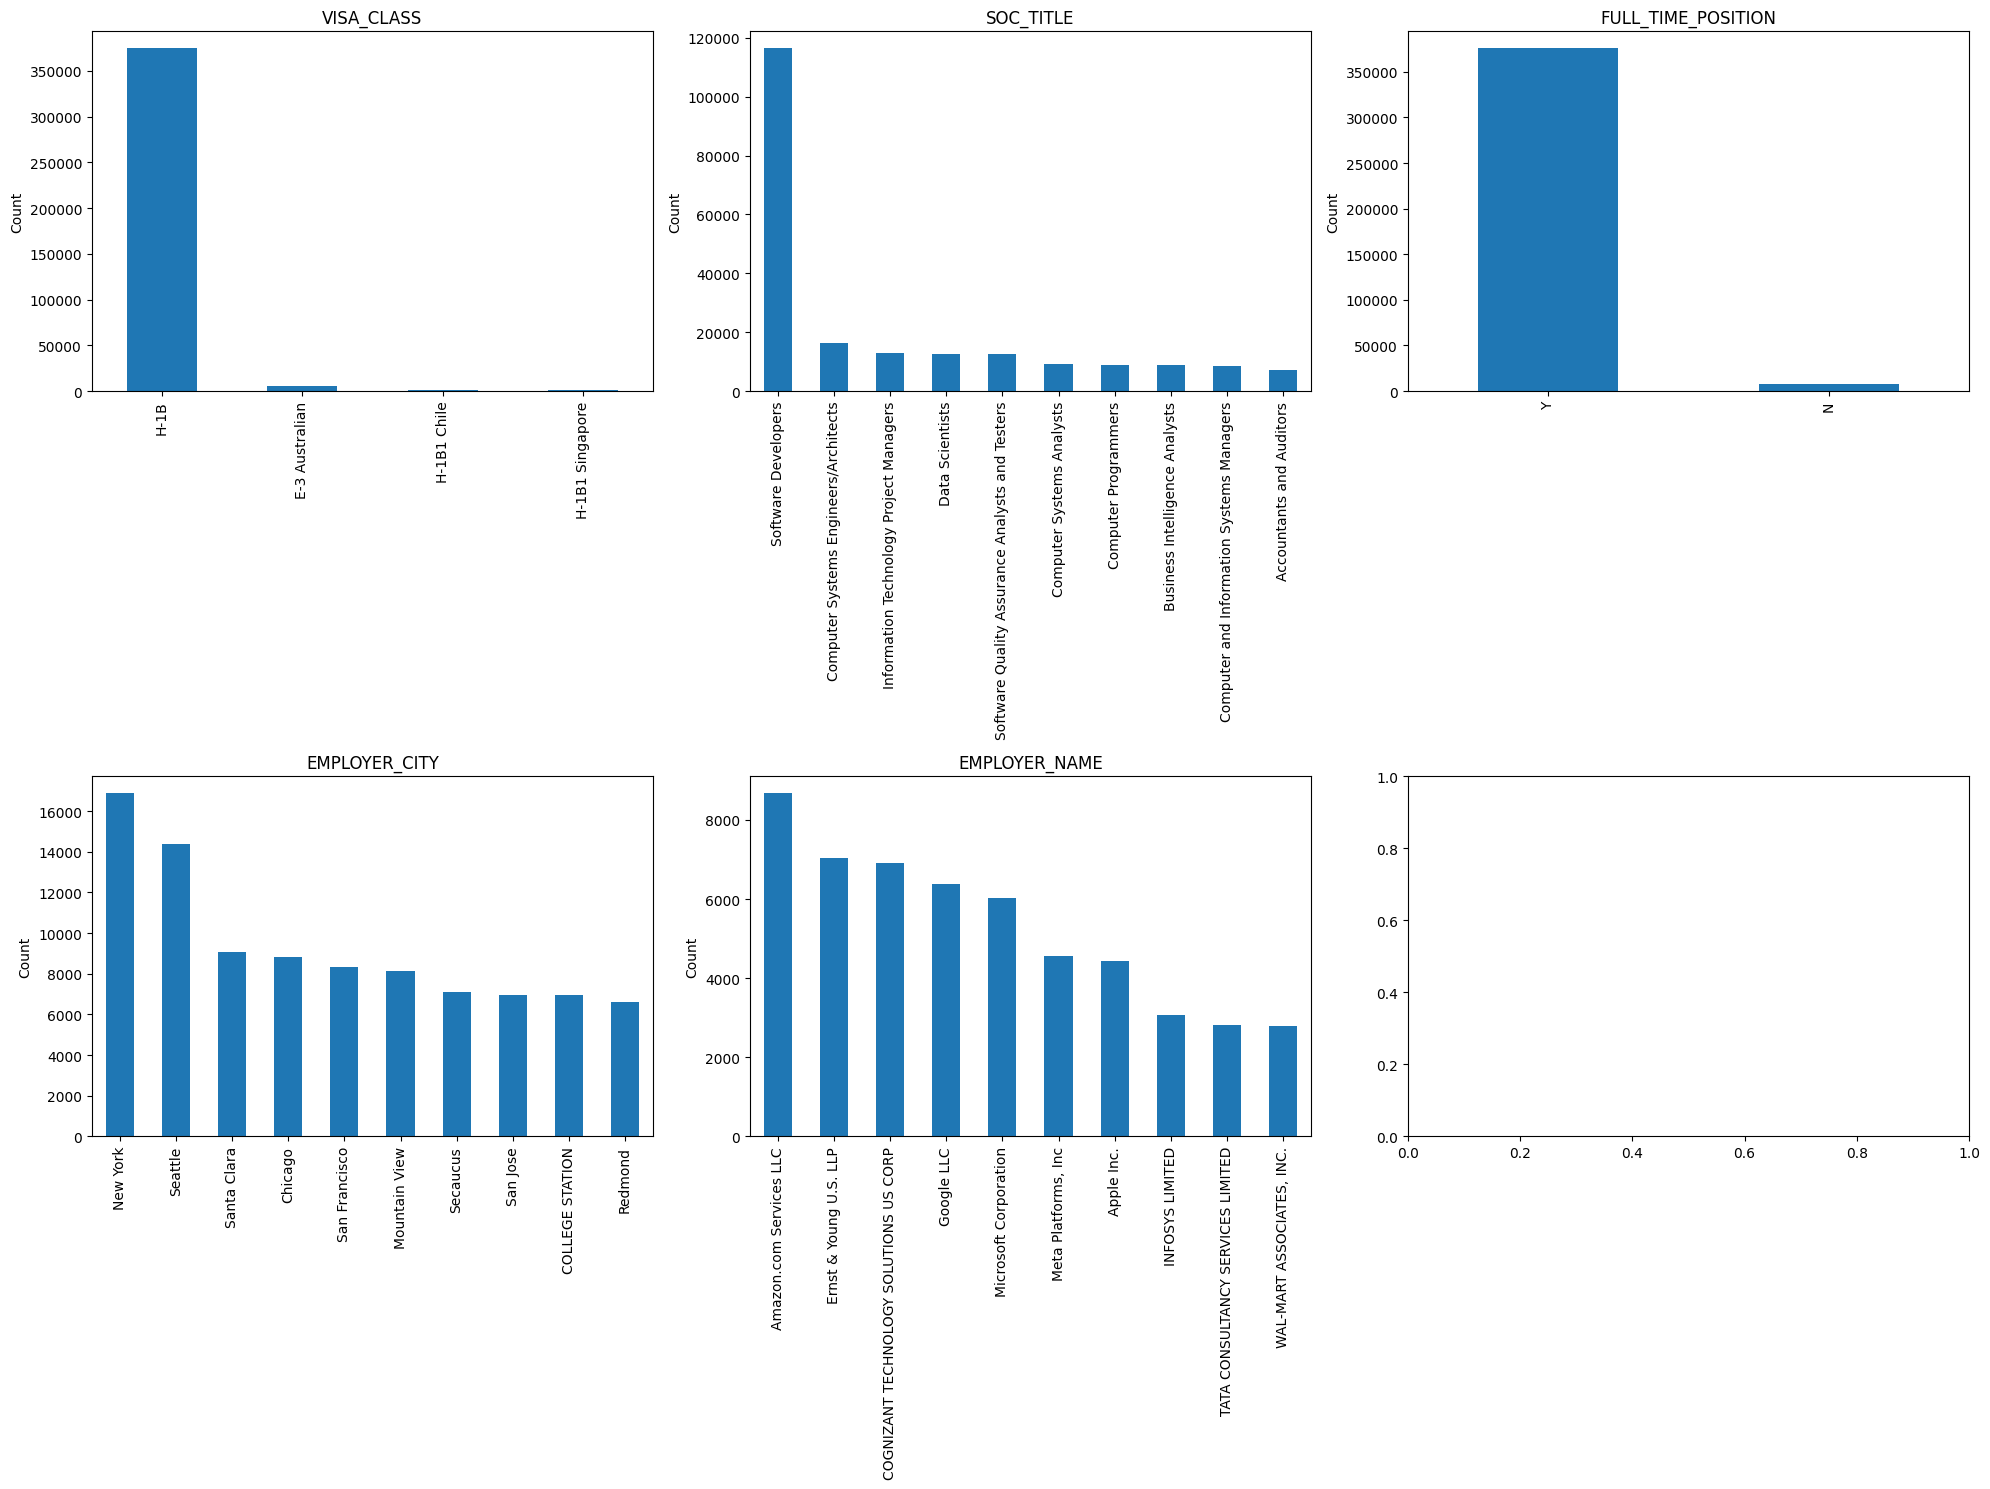

In [25]:
# Plot the distribution of categorical data (used ChatGPT for help)
# Set up grid
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    X_train[col].value_counts().head(10).plot(
        kind='bar', ax=axes[i], title=col
    )
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Step 6: Apply transformation to the data.

In [26]:
# Combined the categorical and numerical data pipeline
preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(sparse_output=True, handle_unknown="ignore"), cat_cols),
    ("num", num_pipeline, num_cols)
    ],
    # output as sparse to be memeory efficient
    sparse_threshold=1.0)

# fit the preprocessor and transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

print(X_train_processed.shape)
print(X_test_processed.shape)

(383204, 66079)
(95801, 66079)


**Summary**: I selected "CASE_STATUS" as the lable to predict and "VISA_CLASS", "SOC_TITLE", "FULL_TIME_POSITION", "EMPLOYER_POC_COUNTRY", "EMPLOYER_CITY", "PREVAILING_WAGE", "EMPLOYER_NAME" as the features. Only "PREVAILING_WAGE" is numerical. All the other features are categorical.